In [71]:
import pandas as pd
import numpy as np

In [72]:
dataSet = pd.read_csv("Alzheimer.csv")
dataSet

,HN,Education,age,hypertension,heart_disease,family history,Occupation,Triglycerides,Blood Sugar,BMI,smoking_status,alzheimer
0,11046,Secondary School,67.0,0,1,Yes,Private,Normal,228.69,36.6,formerly smoked,1
1,51676,Bachelor,61.0,0,0,Yes,Freelance,High,202.21,NaN,never smoked,1
2,35112,Secondary School,80.0,0,1,Yes,Private,High,105.92,32.5,never smoked,1
3,67182,Bachelor,49.0,0,0,Yes,Private,Normal,171.23,34.4,smokes,1
4,1665,Bachelor,79.0,1,0,Yes,Freelance,High,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4095,68398,Secondary School,82.0,1,0,Yes,Freelance,High,71.97,28.3,never smoked,0
4096,14180,Bachelor,13.0,0,0,No,Farmer,High,103.08,18.6,Unknown,0
4097,44873,Bachelor,81.0,0,0,Yes,Freelance,Normal,125.20,40.0,never smoked,0
4098,19723,Bachelor,35.0,0,0,Yes,Freelance,High,82.99,30.6,never smoked,0


# MARK: Data Processing

In [73]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HN              4100 non-null   int64  
 1   Education       4100 non-null   object 
 2   age             4100 non-null   float64
 3   hypertension    4100 non-null   int64  
 4   heart_disease   4100 non-null   int64  
 5   family history  4100 non-null   object 
 6   Occupation      4100 non-null   object 
 7   Triglycerides   4100 non-null   object 
 8   Blood Sugar     4100 non-null   float64
 9   BMI             3936 non-null   float64
 10  smoking_status  4100 non-null   object 
 11  alzheimer       4100 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 384.5+ KB


In [74]:
dataSet.isna().sum()

HN                  0
Education           0
age                 0
hypertension        0
heart_disease       0
family history      0
Occupation          0
Triglycerides       0
Blood Sugar         0
BMI               164
smoking_status      0
alzheimer           0
dtype: int64

### MARK: เลือกที่จะ drop ทิ้งเพราะว่า Null มีจำนวนไม่เยอะมาก ไม่มีผลต่อ data เท่าที่ควร และ ไม่สามารถหาค่า BMI มาแทนที่ได้เพราะไม่มี weight และ height ของผู้ป่วย

In [75]:
dataSet = dataSet.dropna()
dataSet.isna().sum()

HN                0
Education         0
age               0
hypertension      0
heart_disease     0
family history    0
Occupation        0
Triglycerides     0
Blood Sugar       0
BMI               0
smoking_status    0
alzheimer         0
dtype: int64

### MARK: ตรวจสอบ Class Target จำนวนเหมาะสมกันหรือไม่

In [76]:
print("Target == 1 ->", len(dataSet.loc[dataSet["alzheimer"] == 1, "alzheimer"]))

Target == 1 -> 202


In [77]:
print("Target == 1 ->", len(dataSet.loc[dataSet["alzheimer"] == 0, "alzheimer"]))

Target == 1 -> 3734


### MARK: ปรับข้อมูล เป็น 0,1 <- LabelEncoder

In [78]:
from sklearn.preprocessing import LabelEncoder

In [79]:
dataSet.head()

,HN,Education,age,hypertension,heart_disease,family history,Occupation,Triglycerides,Blood Sugar,BMI,smoking_status,alzheimer
0,11046,Secondary School,67.0,0,1,Yes,Private,Normal,228.69,36.6,formerly smoked,1
2,35112,Secondary School,80.0,0,1,Yes,Private,High,105.92,32.5,never smoked,1
3,67182,Bachelor,49.0,0,0,Yes,Private,Normal,171.23,34.4,smokes,1
4,1665,Bachelor,79.0,1,0,Yes,Freelance,High,174.12,24.0,never smoked,1
5,66889,Secondary School,81.0,0,0,Yes,Private,Normal,186.21,29.0,formerly smoked,1


In [80]:
label_encoder = LabelEncoder()

In [81]:
dataSet['Education'] = label_encoder.fit_transform(dataSet['Education'])
dataSet['family history'] = label_encoder.fit_transform(dataSet['family history'])
dataSet['Occupation'] = label_encoder.fit_transform(dataSet['Occupation'])
dataSet['Triglycerides'] = label_encoder.fit_transform(dataSet['Triglycerides'])
dataSet['smoking_status'] = label_encoder.fit_transform(dataSet['smoking_status'])

C:\Users\PP\AppData\Local\Temp\ipykernel_25480\447424765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataSet['Education'] = label_encoder.fit_transform(dataSet['Education'])
C:\Users\PP\AppData\Local\Temp\ipykernel_25480\447424765.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataSet['family history'] = label_encoder.fit_transform(dataSet['family history'])
C:\Users\PP\AppData\Local\Temp\ipykernel_25480\447424765.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [82]:
dataSet

,HN,Education,age,hypertension,heart_disease,family history,Occupation,Triglycerides,Blood Sugar,BMI,smoking_status,alzheimer
0,11046,1,67.0,0,1,1,4,1,228.69,36.6,1,1
2,35112,1,80.0,0,1,1,4,0,105.92,32.5,2,1
3,67182,0,49.0,0,0,1,4,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,1,0,174.12,24.0,2,1
5,66889,1,81.0,0,0,1,4,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4095,68398,1,82.0,1,0,1,1,0,71.97,28.3,2,0
4096,14180,0,13.0,0,0,0,0,0,103.08,18.6,0,0
4097,44873,0,81.0,0,0,1,1,1,125.20,40.0,2,0
4098,19723,0,35.0,0,0,1,1,0,82.99,30.6,2,0


# MARK: แบ่งข้อมูล

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

### MARK: train_test_split

In [84]:
X = dataSet.drop(['HN', 'alzheimer'], axis=1)#dataSet.drop('alzheimer', axis=1)
y = dataSet["alzheimer"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [85]:
X_train.head()

,Education,age,hypertension,heart_disease,family history,Occupation,Triglycerides,Blood Sugar,BMI,smoking_status
2837,0,22.0,0,0,0,4,0,80.72,29.3,0
2069,1,46.0,0,0,1,4,0,78.44,23.9,2
1724,0,42.0,0,0,1,1,1,124.34,34.7,1
1826,0,54.0,0,0,1,3,0,102.61,32.4,0
514,1,9.0,0,0,0,0,1,122.22,17.7,0


In [86]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2755 entries, 2837 to 3323
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Education       2755 non-null   int32  
 1   age             2755 non-null   float64
 2   hypertension    2755 non-null   int64  
 3   heart_disease   2755 non-null   int64  
 4   family history  2755 non-null   int32  
 5   Occupation      2755 non-null   int32  
 6   Triglycerides   2755 non-null   int32  
 7   Blood Sugar     2755 non-null   float64
 8   BMI             2755 non-null   float64
 9   smoking_status  2755 non-null   int32  
dtypes: float64(3), int32(5), int64(2)
memory usage: 182.9 KB


In [87]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 2755 entries, 2837 to 3323
Series name: alzheimer
Non-Null Count  Dtype
--------------  -----
2755 non-null   int64
dtypes: int64(1)
memory usage: 43.0 KB


### SMOTE (Synthetic Minority Over-sampling Technique): วิธีการที่ใช้การสร้างตัวอย่างสัญญาณเทียบเท่าจากคลาสน้อยโดยการผสมคุณลักษณะของตัวอย่างในคลาสน้อย

In [88]:
from imblearn.over_sampling import SMOTE

In [89]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# MARK: Decision tree model Start (Default)

In [90]:
clfModel = tree.DecisionTreeClassifier(criterion="gini",class_weight='balanced',random_state=42)

In [91]:
clfModel.get_params()

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [92]:
clfModel.fit(X_train_smote,y_train_smote)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [93]:
print("ตัวอย่างข้อมูลชุดเรียนรู้ ->",clfModel.score(X_train_smote,y_train_smote))
# อันเดียวกัน
# y_train_pred = clf.predict(X_train)
# accuracy_score(y_train, y_train_pred)

ตัวอย่างข้อมูลชุดเรียนรู้ -> 1.0


### MARK: Visualize Decision Tree

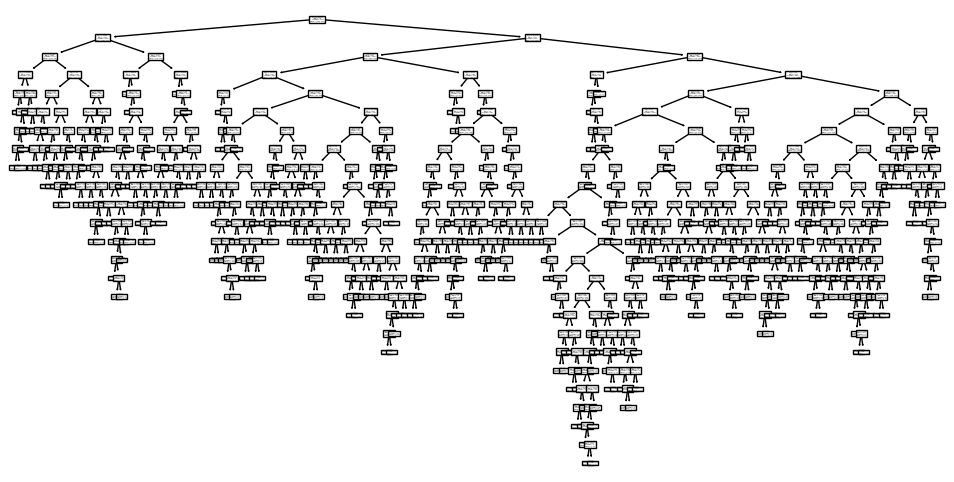

In [94]:
plt.figure(figsize=(12, 6))
tree.plot_tree(clfModel.fit(X_train_smote,y_train_smote))
plt.show()

### MARK: Predict and Score Model

In [95]:
y_pred = clfModel.predict(X_test)
print("ตัวอย่างข้อมูลชุดทดสอบ ->",accuracy_score(y_test, y_pred))

ตัวอย่างข้อมูลชุดทดสอบ -> 0.8653683319220999


In [96]:
pd.crosstab(y_test, y_pred)

col_0,0,1
alzheimer,,
0,1008,106
1,53,14


In [97]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.93      1114
           1       0.12      0.21      0.15        67

    accuracy                           0.87      1181
   macro avg       0.53      0.56      0.54      1181
weighted avg       0.90      0.87      0.88      1181



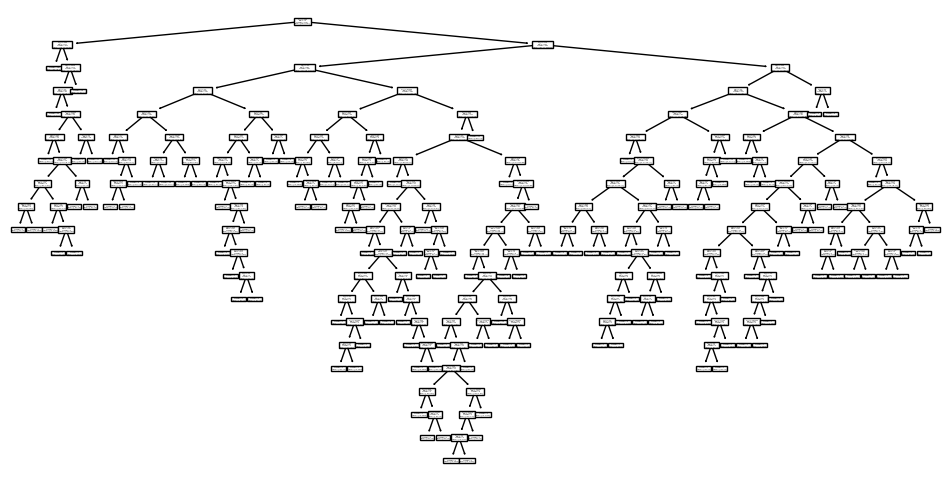

In [98]:
plt.figure(figsize=(12, 6))
tree.plot_tree(clfModel.fit(X_test,y_test))
plt.show()

## MARK: หา Best Parameter และ ลองทำ Pruning 

In [99]:
from sklearn.model_selection import GridSearchCV

### MARK: ค้นหา best_params และประเมิน best_accuracy

In [100]:
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}
treeModel = tree.DecisionTreeClassifier()
# สร้าง Grid Search
grid_search = GridSearchCV(treeModel, param_grid, cv=10, scoring='accuracy')

In [101]:
grid_search.fit(X_train_smote,y_train_smote)

C:\Users\PP\anaconda3\envs\CallmeEnv\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
900 fits failed out of a total of 2700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
900 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\PP\anaconda3\envs\CallmeEnv\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\PP\anaconda3\envs\CallmeEnv\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\PP\anaconda3\envs\CallmeEnv\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [102]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}


In [103]:
best_accuracy = grid_search.best_score_
print("Best Accuracy:", best_accuracy)

Best Accuracy: 0.8736641221374046


In [136]:
print("Best:",grid_search.best_score_,"using" , grid_search.best_params_)
means = grid_search.cv_results_["mean_test_score"]
stds = grid_search.cv_results_["std_test_score"]
params = grid_search.cv_results_["params"]
for means, stds, params in zip(means, stds, params):
    print("means -> %f stds-> (%f) params with: %r", means, stds, params)

Best: 0.8736641221374046 using {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2}
means -> %f stds-> (%f) params with: %r nan nan {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}
means -> %f stds-> (%f) params with: %r nan nan {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5}
means -> %f stds-> (%f) params with: %r nan nan {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10}
means -> %f stds-> (%f) params with: %r nan nan {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2}
means -> %f stds-> (%f) params with: %r nan nan {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5}
means -> %f stds-> (%f) params with: %r nan nan {'criterion': 'gini', 'ma

In [105]:
clfModel_BestParam = tree.DecisionTreeClassifier(
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    criterion=best_params['criterion']
)

In [106]:
clfModel_BestParam.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=2)

In [107]:
print("ตัวอย่างข้อมูลชุดเรียนรู้ ->",clfModel_BestParam.score(X_train_smote, y_train_smote))

ตัวอย่างข้อมูลชุดเรียนรู้ -> 0.9032442748091603


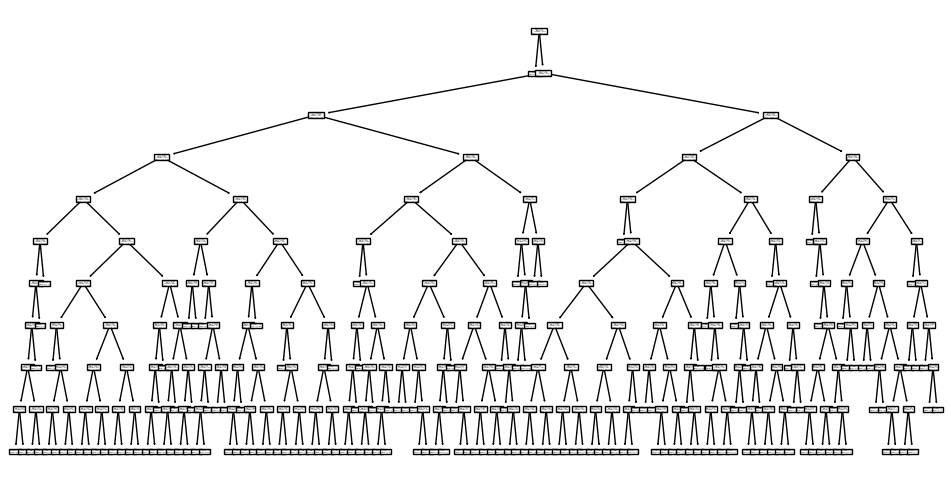

In [108]:
plt.figure(figsize=(12, 6))
tree.plot_tree(clfModel_BestParam.fit(X_train_smote,y_train_smote))
plt.show()

In [109]:
y_pred = clfModel_BestParam.predict(X_test)
print("ตัวอย่างข้อมูลชุดทดสอบ ->",accuracy_score(y_test, y_pred))

ตัวอย่างข้อมูลชุดทดสอบ -> 0.8027095681625741


In [110]:
pd.crosstab(y_test, y_pred)

col_0,0,1
alzheimer,,
0,927,187
1,46,21


In [111]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.83      0.89      1114
           1       0.10      0.31      0.15        67

    accuracy                           0.80      1181
   macro avg       0.53      0.57      0.52      1181
weighted avg       0.90      0.80      0.85      1181



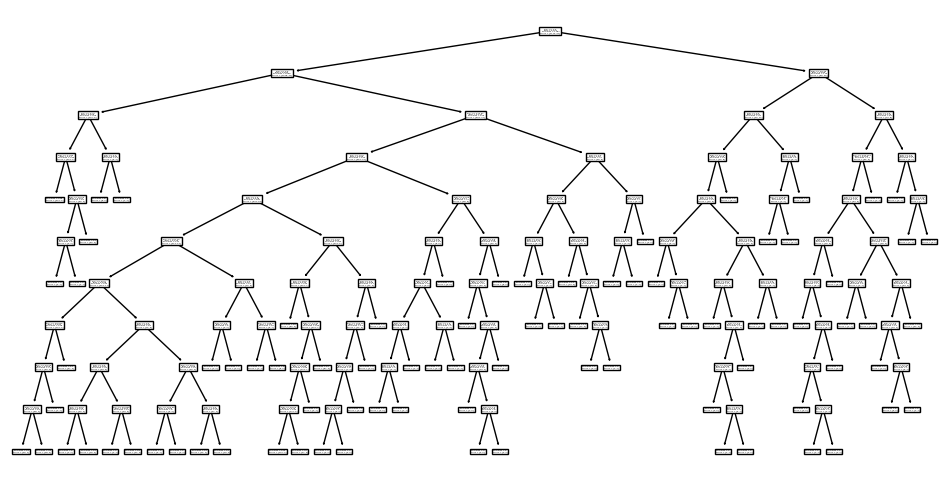

In [112]:
plt.figure(figsize=(12, 6))
tree.plot_tree(clfModel_BestParam.fit(X_test,y_test))
plt.show()

## MARK: feature_importances จากชุดเรียนรู้

In [113]:
np.array([X.columns.values.tolist(), list(clfModel.feature_importances_)]).T

array([['Education', '0.016650279771710758'],
       ['age', '0.4635206866578581'],
       ['hypertension', '0.025692443685866907'],
       ['heart_disease', '0.025645844958020747'],
       ['family history', '0.009696969696970018'],
       ['Occupation', '0.06268895448579194'],
       ['Triglycerides', '0.00946328740295296'],
       ['Blood Sugar', '0.1580657103713937'],
       ['BMI', '0.15855291708234448'],
       ['smoking_status', '0.07002290588709051']], dtype='<U32')

In [114]:
feature_names = X.columns.values.tolist()
importances = clfModel.feature_importances_
indices = np.argsort(importances)[::-1]

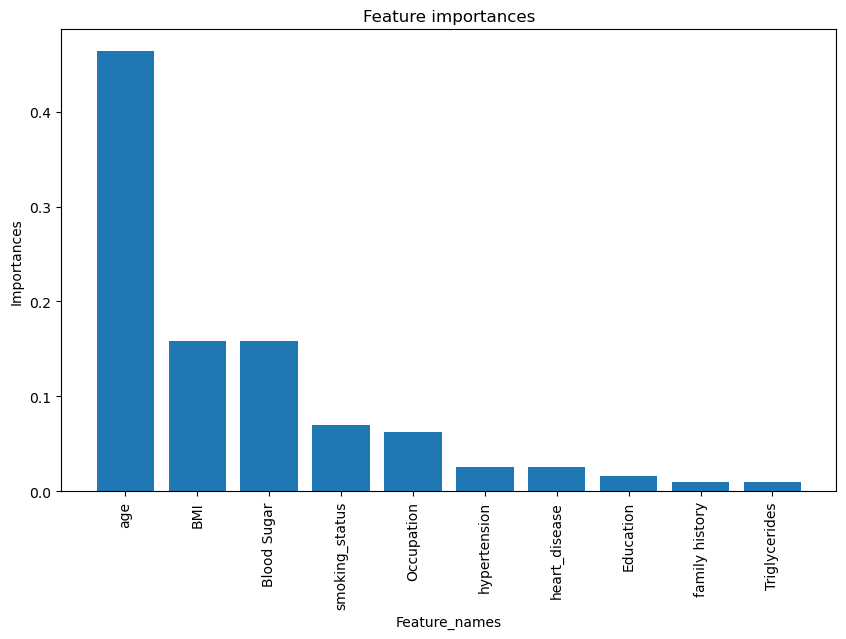

In [115]:
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlabel("Feature_names")
plt.ylabel("Importances")
plt.title("Feature importances")
plt.show()

### MARK: เลือก Feature importances 4 อันดับแรก เข้า model

In [116]:
from sklearn.model_selection import cross_val_score

In [117]:
feature_importances_Select = ['age', 'smoking_status', 'Blood Sugar', 'BMI']

In [118]:
X_feature_importances = dataSet[feature_importances_Select]
y_feature_importances = dataSet["alzheimer"]
X_trainIm, X_testIm, y_trainIm, y_testIm = train_test_split(X_feature_importances, y_feature_importances, test_size=0.3, random_state=42)

In [119]:
X_train_smote_Im, y_train_smote_Im = smote.fit_resample(X_trainIm, y_trainIm)

### MARK: Select Feature importances Top 4

In [120]:
clfModel_Im = tree.DecisionTreeClassifier(criterion="gini",class_weight='balanced', random_state=42)

In [121]:
clfModel_Im.fit(X_train_smote_Im, y_train_smote_Im)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [122]:
print("ตัวอย่างข้อมูลชุดเรียนรู้ ->",clfModel_Im.score(X_train_smote_Im, y_train_smote_Im))

ตัวอย่างข้อมูลชุดเรียนรู้ -> 1.0


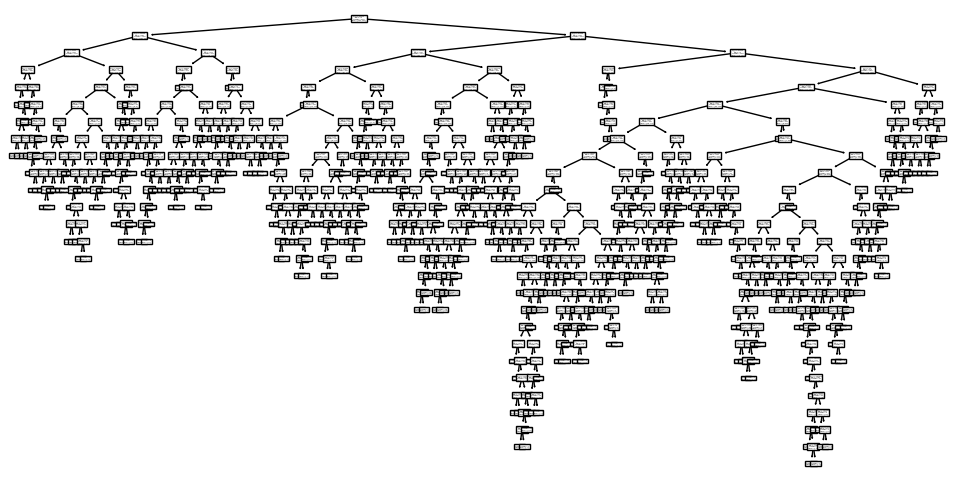

In [123]:
plt.figure(figsize=(12, 6))
tree.plot_tree(clfModel_Im.fit(X_train_smote_Im, y_train_smote_Im))
plt.show()

In [124]:
y_predIm = clfModel_Im.predict(X_testIm)
print("ตัวอย่างข้อมูลทดสอบ ->",accuracy_score(y_testIm, y_predIm))

ตัวอย่างข้อมูลทดสอบ -> 0.8602878916172735


In [125]:
pd.crosstab(y_testIm, y_predIm)

col_0,0,1
alzheimer,,
0,998,116
1,49,18


In [126]:
print("Classification Report:\n", classification_report(y_testIm, y_predIm))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92      1114
           1       0.13      0.27      0.18        67

    accuracy                           0.86      1181
   macro avg       0.54      0.58      0.55      1181
weighted avg       0.91      0.86      0.88      1181



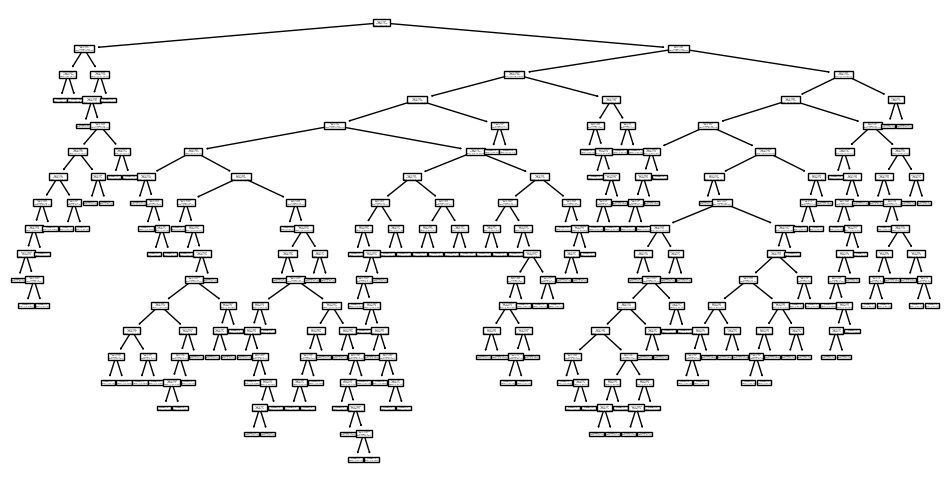

In [127]:
plt.figure(figsize=(12, 6))
tree.plot_tree(clfModel_Im.fit(X_testIm, y_testIm))
plt.show()

## MARK: feature_importances Top 4 + Best param

In [128]:
clfModel_BestParam = tree.DecisionTreeClassifier(
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    max_features=best_params['max_features'],
    criterion=best_params['criterion']
)

In [139]:
clfModel_BestParam.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [129]:
clfModel_BestParam.fit(X_train_smote_Im, y_train_smote_Im)

DecisionTreeClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=2)

In [130]:
print("ตัวอย่างข้อมูลชุดเรียนรู้ ->",clfModel_BestParam.score(X_train_smote_Im, y_train_smote_Im))

ตัวอย่างข้อมูลชุดเรียนรู้ -> 0.8793893129770992


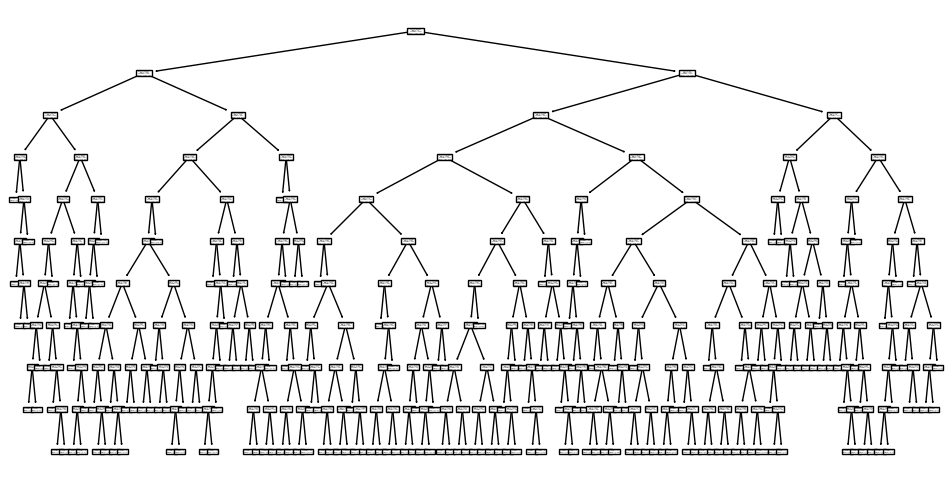

In [131]:
plt.figure(figsize=(12, 6))
tree.plot_tree(clfModel_BestParam.fit(X_train_smote_Im,y_train_smote_Im))
plt.show()

In [132]:
y_pred = clfModel_BestParam.predict(X_testIm)
print("ตัวอย่างข้อมูลชุดทดสอบ ->",accuracy_score(y_testIm, y_pred))

ตัวอย่างข้อมูลชุดทดสอบ -> 0.7993226079593565


In [133]:
pd.crosstab(y_testIm, y_pred)

col_0,0,1
alzheimer,,
0,917,197
1,40,27


In [134]:
print("Classification Report:\n", classification_report(y_testIm, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.82      0.89      1114
           1       0.12      0.40      0.19        67

    accuracy                           0.80      1181
   macro avg       0.54      0.61      0.54      1181
weighted avg       0.91      0.80      0.85      1181



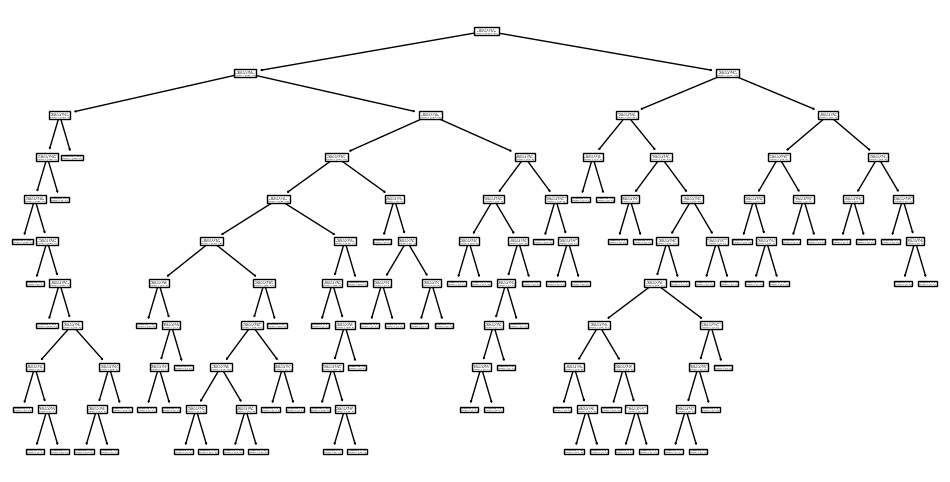

In [135]:
plt.figure(figsize=(12, 6))
tree.plot_tree(clfModel_BestParam.fit(X_testIm,y_testIm))
plt.show()